<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


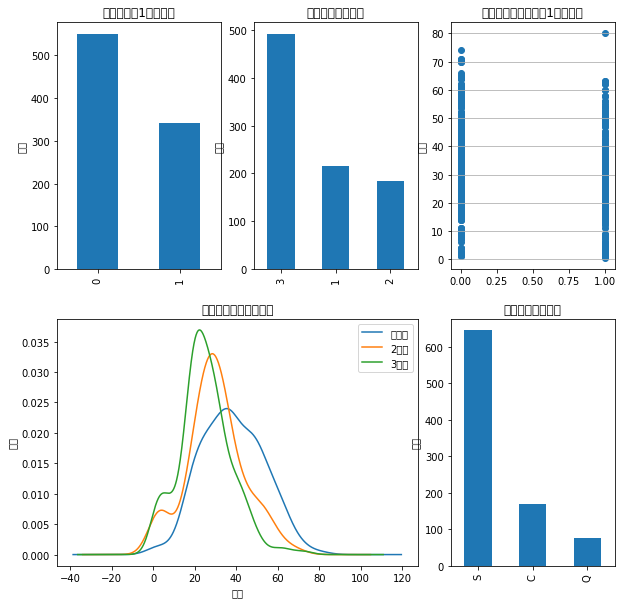

In [82]:
#encoding = utf-8
import pandas as pd  #data analysis and modeling.
import numpy as np #cientific computing
from pandas import Series,DataFrame

data_train = pd.read_csv("G:\Machine learning\Titanic\\train.csv")
data_train

data_train.describe()
data_train.info()
#encoding = utf-8
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
fig.set(alpha = 0.2)
plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind = 'bar')
plt.title(u"获救情况（1为获救）")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind = 'bar')
plt.title(u"乘客等级分布情况")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel(u"年龄")
#b： [True|False]或者是布尔数组、或[‘on’,‘off’] 表示网格是否开启
#which： [major(默认)|minor|both] 选择主、次网格开启方式
#axis： [both(默认)|x|y] 选择使用网格的数轴
plt.grid(b = True,which = 'major',axis = 'y')        
plt.title(u"按年龄看获救分布（1为获救）")

plt.subplot2grid((2,3),(1,0),colspan = 2)
data_train.Age[data_train.Pclass == 1].plot(kind = 'kde')
data_train.Age[data_train.Pclass == 2].plot(kind = 'kde')
data_train.Age[data_train.Pclass == 3].plot(kind = 'kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u"头等舱",u"2等舱",u"3等舱"),loc ='best')#图例  自适应

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind = 'bar')
plt.title(u"各登船口上岸人数")
plt.ylabel(u"人数")
plt.show()



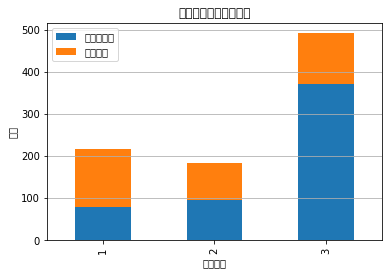

In [83]:
fig = plt.figure(figsize = (10,10))
fig.set(alpha = 0.2)
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救人数':Survived_1,u'未获救人数':Survived_0})
df.plot(kind = 'bar',stacked = True)
plt.title(u"各乘客等级的获救情况")
plt.ylabel(u"人数")
plt.xlabel(u"乘客等级")
plt.grid(b = True,which = 'major',axis = 'y')
plt.show()

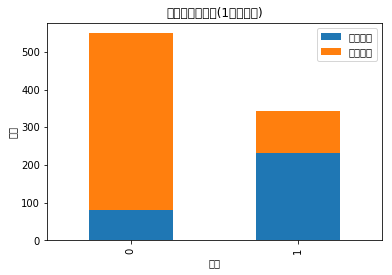

In [84]:
#各性别获救情况
fig = plt.figure(figsize = (10,10))
fig.set(alpha = 0.2)

Survived_male = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_female = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u"获救女性":Survived_female,u"获救男性":Survived_male})
df.plot(kind = 'bar',stacked = True)
plt.title(u"各性别获救情况(1代表获救)")
plt.ylabel(u"人数")
plt.xlabel(u"性别")
plt.show()

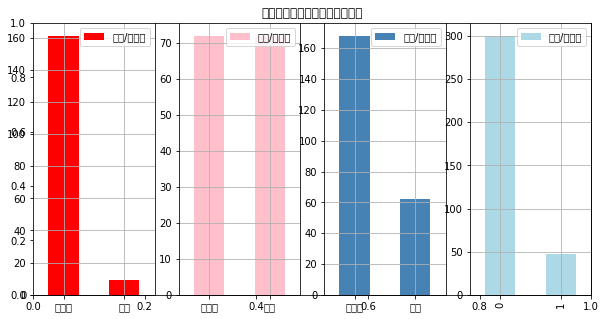

In [85]:
fig = plt.figure(figsize = (10,5))
fig.set(alpha = 0.65)
plt.title(u"根据船舱等级和性别看获救情况")


ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind = 'bar',label = 'female highclass',color = 'red')
ax1.set_xticklabels([u"未获救",u"获救"],rotation = 0)
plt.legend([u"女性/高级舱"],loc = 'best')
plt.grid(b = True)

ax2 = fig.add_subplot(142)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind = 'bar',label = 'female lowclass',color = 'pink')
ax2.set_xticklabels([u"未获救",u"获救"],rotation = 0)
plt.legend([u"女性/低级舱"],loc = 'best')
plt.grid(b = True)

ax3 = fig.add_subplot(143)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind ='bar',label = 'male highclass',color = 'steelblue')
ax3.set_xticklabels([u"未获救",u"获救"],rotation = 0)
plt.legend([u"男性/高级舱"],loc = 'best')
plt.grid(b = True)


ax4 = fig.add_subplot(144)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind ='bar',label = 'male highclass',color = 'lightblue')
ax3.set_xticklabels([u"未获救",u"获救"],rotation = 0)
plt.legend([u"男性/低级舱"],loc = 'best')
plt.grid(b = True)


plt.show()

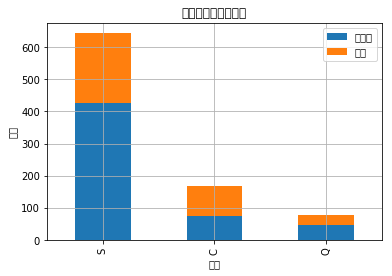

In [86]:
#各登陆港口的获救情况
fig = plt.figure(figsize = (10,5))
fig.set(alpha = 0.6)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

df= pd.DataFrame({u"获救":Survived_1,u"未获救":Survived_0})
df.plot(kind = 'bar',stacked =True)
plt.title(u"各港口登陆获救情况")
plt.xlabel(u"港口")
plt.ylabel(u"人数")

plt.grid(b = True)
plt.show()

In [87]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df



                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


      0    1
有    68  136
没有  481  206


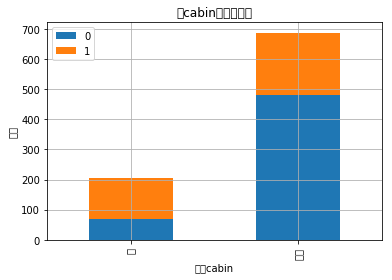

In [88]:
fig = plt.figure(figsize = (10,5))
fig.set(alpha = 0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()

df = pd.DataFrame({u"有":Survived_cabin,u"没有":Survived_nocabin}).transpose()
print df
df.plot(kind = 'bar',stacked = True)
plt.title(u"按cabin看获救情况")
plt.xlabel(u"有无cabin")
plt.ylabel(u"人数")
plt.grid(b = True)
plt.show()

In [143]:
#encoding = utf-8
import pandas as pd  #data analysis and modeling.
import numpy as np #cientific computing
from pandas import Series,DataFrame
from sklearn.ensemble import RandomForestRegressor
data_train = pd.read_csv("G:\Machine learning\Titanic\\train.csv")
#data_train.info()
#使用RandomForestClassfier 填补年龄属性
def set_missing_age(df):
    #把已有的数值型特征取出来 扔进Rando Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    #区分有年龄值和没有年龄值得
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    #print("known_age = ",known_age)
    #print("unknown_age = ",unknown_age)
    
    #y  目标年龄
    y = known_age[:,0]
   # print("y = ",y)
    
    #x特征属性值
    X = known_age[:,1:]
   # print("X = ",X)
    
    #fit 到RandomForestRegressor 中
    rfr = RandomForestRegressor(random_state = 0,n_estimators = 2000,n_jobs = -1)
    rfr.fit(X,y)
    
    predictedAge = rfr.predict(unknown_age[:,1:])
    df.loc[(df.Age.isnull()),'Age'] = predictedAge
    return df,rfr
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'  
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df
 
data_train,rfr = set_missing_age(data_train)
data_train = set_Cabin_type (data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [144]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix = 'Embarked')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix = 'Pclass')
dummies_Sex = pd.get_dummies(data_train['Sex'],prefix = 'Sex')

df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis = 1)
df.drop(['Pclass','Sex','Name','Cabin','Embarked','Ticket'],axis = 1,inplace = True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,0,1,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,0,1,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,0,1,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0,0,1
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,0,1,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1,1,0
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0,1,0


In [145]:
import pandas as pd  #data analysis and modeling.
import numpy as np #cientific computing
from pandas import Series,DataFrame
from sklearn.ensemble import RandomForestRegressor
data_train = pd.read_csv("G:\Machine learning\Titanic\\train.csv")
#对age fare进行归一化处理  利用 sklearn preprocessing standardscalee()函数
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1)) #添加 .values.reshape(-1,1)  否则参数格式报错
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1),age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1),fare_scale_param)

df


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,0,1,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,0,1,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0,0,1,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,0,1,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1,1,0,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0,1,0,-1.148655,-0.042956


In [146]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
train_df.info()
clf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived       891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Age_scaled     891 non-null float64
Fare_scaled    891 non-null float64
dtypes: float64(2), int64(3), uint8(10)
memory usage: 43.6 KB


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [147]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import sklearn.preprocessing as preprocessing

def set_Cabin_type(df):
    df.loc[df.Cabin.notnull(),'Cabin'] = 'Yes'  
    df.loc[df.Cabin.isnull(),'Cabin'] = 'No'
    return df
data_test = pd.read_csv("G:\Machine learning\Titanic\\test.csv")
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0


def set_missing_age(df):
    age_df = df[['Age','Pclass','SibSp','Parch','Fare']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    y = known_age[:,0]
    X = known_age[:,1:]

    rfr = RandomForestRegressor(random_state = 0,n_estimators = 200,n_jobs = -1)
    rfr.fit(X,y)
    predicted_age = rfr.predict(unknown_age[:,1:])
    data_test.loc[df.Age.isnull(),'Age'] = predicted_age
    return df,rfr

#填补年龄 Cabin
data_test,rfr = set_missing_age(data_test)
data_test = set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'],prefix = 'Cabin') 
dummies_Pclass = pd.get_dummies(data_test['Pclass'],prefix = 'Pclass')
dummies_Sex = pd.get_dummies(data_test['Sex'],prefix = 'Sex')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix = 'Embarked')

df_test= pd.concat([data_test,dummies_Cabin,dummies_Pclass,dummies_Sex,dummies_Embarked],axis = 1)
df_test.info()

df_test.drop(['Cabin','Pclass','Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)
#对age fare 进行归一化

age_scale_param = scaler.fit(df_test['Age'].values.reshape(-1,1)) 
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1),age_scale_param)

fare_scale_param = scaler.fit(df_test['Fare'].values.reshape(-1,1)) 
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1),fare_scale_param)  
#reshape(-1,1)不是reshape(1,-1)!!!!!!调了半个小时！！！




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Cabin_No       418 non-null uint8
Cabin_Yes      418 non-null uint8
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(4), object(5), uint8(10)
memory usage: 40.1+ KB


In [148]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("G:\Machine learning\Titanic\\logistic_regression_prediction.csv",index = False)

In [149]:
#逻辑回归系统优化
pd.DataFrame({"columns":list(train_df.columns)[1:],"coef":list(clf.coef_.T)})


,coef,columns
0,[-0.344235688447],SibSp
1,[-0.104916014922],Parch
2,[0.0],Cabin_No
3,[0.902108551616],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.41726344521],Embarked_S
7,[0.341158975997],Pclass_1
8,[0.0],Pclass_2
9,[-1.19412983252],Pclass_3


In [151]:
#交叉验证 cross validation
from sklearn import cross_validation

clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
all_data = df.filter(regex = 'SibSp.*|parch.*|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*|Age_.*|Fare_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print(cross_validation.cross_val_score(clf,X,y,cv = 5))

[ 0.68508287  0.61111111  0.67597765  0.65340909  0.67428571]


In [156]:
split_train,split_cv = cross_validation.train_test_split(df,test_size = 0.3,random_state = 0)
train_df = split_train.filter(regex =  'SibSp.*|parch.*|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*|Age_.*|Fare_.*')
#生成模型
clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
clf.fit(train_df.as_matrix()[:,1:],train_df.as_matrix()[:,0])

#对cross validation 进行预测
cv_df = split_cv.filter(regex =  'SibSp.*|parch.*|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*|Age_.*|Fare_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("G:\Machine learning\Titanic\\train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,NaN,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S


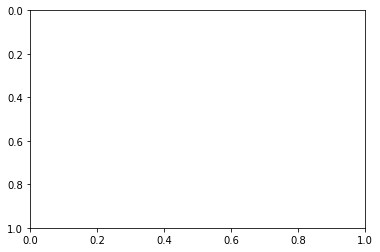

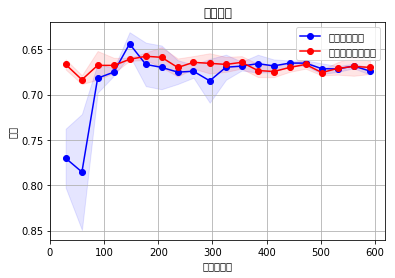

(0.67038230938071219, 0.015209513006049336)

In [159]:
#encoding = utf-8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

In [164]:
#模型融合
from sklearn.ensemble import BaggingRegressor
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

y = train_np[:,0]
X = train_np[:,1:]

clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
bagging_clf = BaggingRegressor(clf,n_estimators = 20,max_samples = 0.8,max_features = 1.0,bootstrap = True,bootstrap_features = False,n_jobs = -1)
bagging_clf.fit(X,y)
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("G:\Machine learning\Titanic\\logistic_regression_bagging_prediction.csv",index = False)
print('Done')

Done
